# 偏差和方差的分析

# Regularized Linear Regression and Bias v.s. Variance

In [74]:
# 使用scipy.io 导入mat文件
import scipy.io as sio
data = sio.loadmat('ex5data1.mat')
print type(data)
# print data

<type 'dict'>


In [75]:
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']
m = np.size(X, axis=0)
m

12

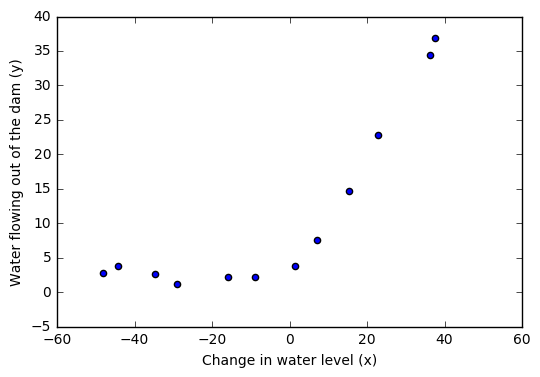

In [76]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

In [77]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
print clf.coef_.shape, clf.coef_ # 系数
print clf.intercept_.shape, clf.intercept_ # 截距
import numpy as np
theta = np.vstack((clf.intercept_, clf.coef_))
print theta.shape
print theta

(1, 1) [[ 0.36777923]]
(1,) [ 13.08790351]
(2, 1)
[[ 13.08790351]
 [  0.36777923]]


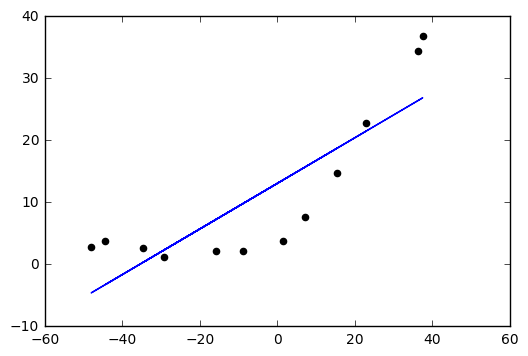

In [79]:
plt.scatter(X, y, c='black')
plt.plot(X, clf.predict(X))
plt.show()

## 偏差Bias-方差variance
- 高偏差---欠拟合
- 高方差---过拟合

## 从下面的代码和图像中可以看出,对于欠拟合，偏差会随着训练数据的增大而增大，方差反之

In [83]:
error_train = np.zeros((m, 1))
error_val = np.zeros((m, 1))
for i in range(m):
    X1 = X[0:i+1, :]
    y1 = y[0:i+1, :]
    clf = LinearRegression()
    clf.fit(X1, y1)
    error_train[i] = 1./(2*(i+1)) * np.sum((clf.predict(X1)-y1)**2)
    error_val[i] = 1./(2*np.size(Xval, axis=0)) * np.sum((clf.predict(Xval)-yval)**2)
  

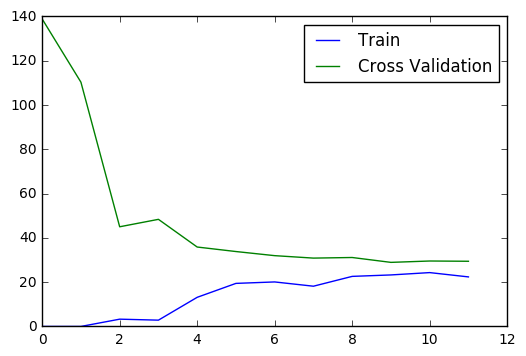

In [84]:
plt.plot(np.arange(m), error_train)
plt.plot(np.arange(m),error_val)
plt.legend(('Train', 'Cross Validation'))
plt.show()

## 多项式回归，为了解决上面高偏差，欠拟合，增加更多的特征

In [117]:
# 增加特征值函数
def polyFeatures(X, p):
    X_poly = np.zeros((np.size(X,axis=0), p))
    for i in range(p):
        X_poly[:, i, np.newaxis] = X**(i+1)
    return X_poly

In [120]:
X_poly = polyFeatures(X, 8)
print X_poly.shape

(12, 8)


In [124]:
# 特征归一化
from sklearn.preprocessing import scale
X_poly = scale(X_poly)
print X_poly[0]

[-0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197 -0.6171516
  0.35983501 -0.53109126]


In [128]:
Xval_poly = polyFeatures(Xval, 8)
Xval_poly = scale(Xval_poly)

In [129]:
error_train = np.zeros((m, 1))
error_val = np.zeros((m, 1))
for i in range(m):
    X1 = X_poly[0:i+1, :]
    y1 = y[0:i+1, :]
    clf = LinearRegression()
    clf.fit(X1, y1)
    error_train[i] = 1./(2*(i+1)) * np.sum((clf.predict(X1)-y1)**2)
    error_val[i] = 1./(2*np.size(Xval_poly, axis=0)) * np.sum((clf.predict(Xval_poly)-yval)**2)

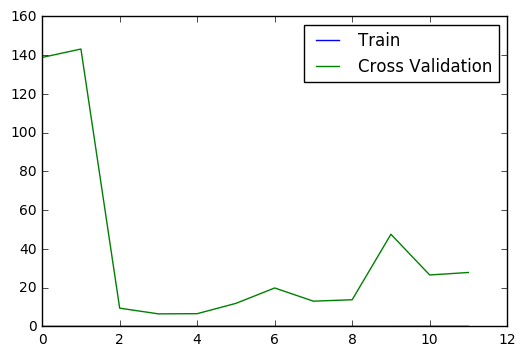

In [130]:
plt.plot(np.arange(m), error_train)
plt.plot(np.arange(m),error_val)
plt.legend(('Train', 'Cross Validation'))
plt.show()

## 对于含有 惩罚值得线性回归，sklearn中是 岭回归